# Analyzing Bitcoin and Ethereum in the past 6 years
Meixiong Peng

## Introduction

A cryptocurrency is a digital or virtual currency that is secured by cryptography, which has super high-level security. It's often used to buy goods and services and even investments. Cryptocurrency has been really popular in recent years, its value is also growing exponentially. More people starting to invest in cryptocurrency and even some country's governments like El Salvador are also involved. 

The most popular cryptocurrency right now is bitcoin. Bitcoin is a digital currency that was created by an unknown group or person with the name Satoshi Nakamoto, who released the bitcoin as an open source software in 2009. It's the first decentralized digital currency which means no one can controll this currency and it's available anywhere in the world. Its current price is approximately $49,000. 

The second-largest cryptocurrency right now is Ethereum, it was created in 2013 by programmer Vitalik Buterin and his group, which has a current price of around $4000. People are saying Ethereum might beat Bitcoin and become the largest cryptocurrency, But we can see there are still a large price diffence between them. Therefore, in this tutorial, I'll target Bitcoin and Ethereum specifically, and try to analyze them from a data science perspective. I'll find if there are any patterns throughout the years and find the correlation between Bitcoin and Ethereum. After that, I will use sklearn regression models and try to do some predictions about their future prices. 

You can learn more about Bitcoin and Ethereum [here](https://www.investopedia.com/articles/investing/031416/bitcoin-vs-ethereum-driven-different-purposes.asp) 

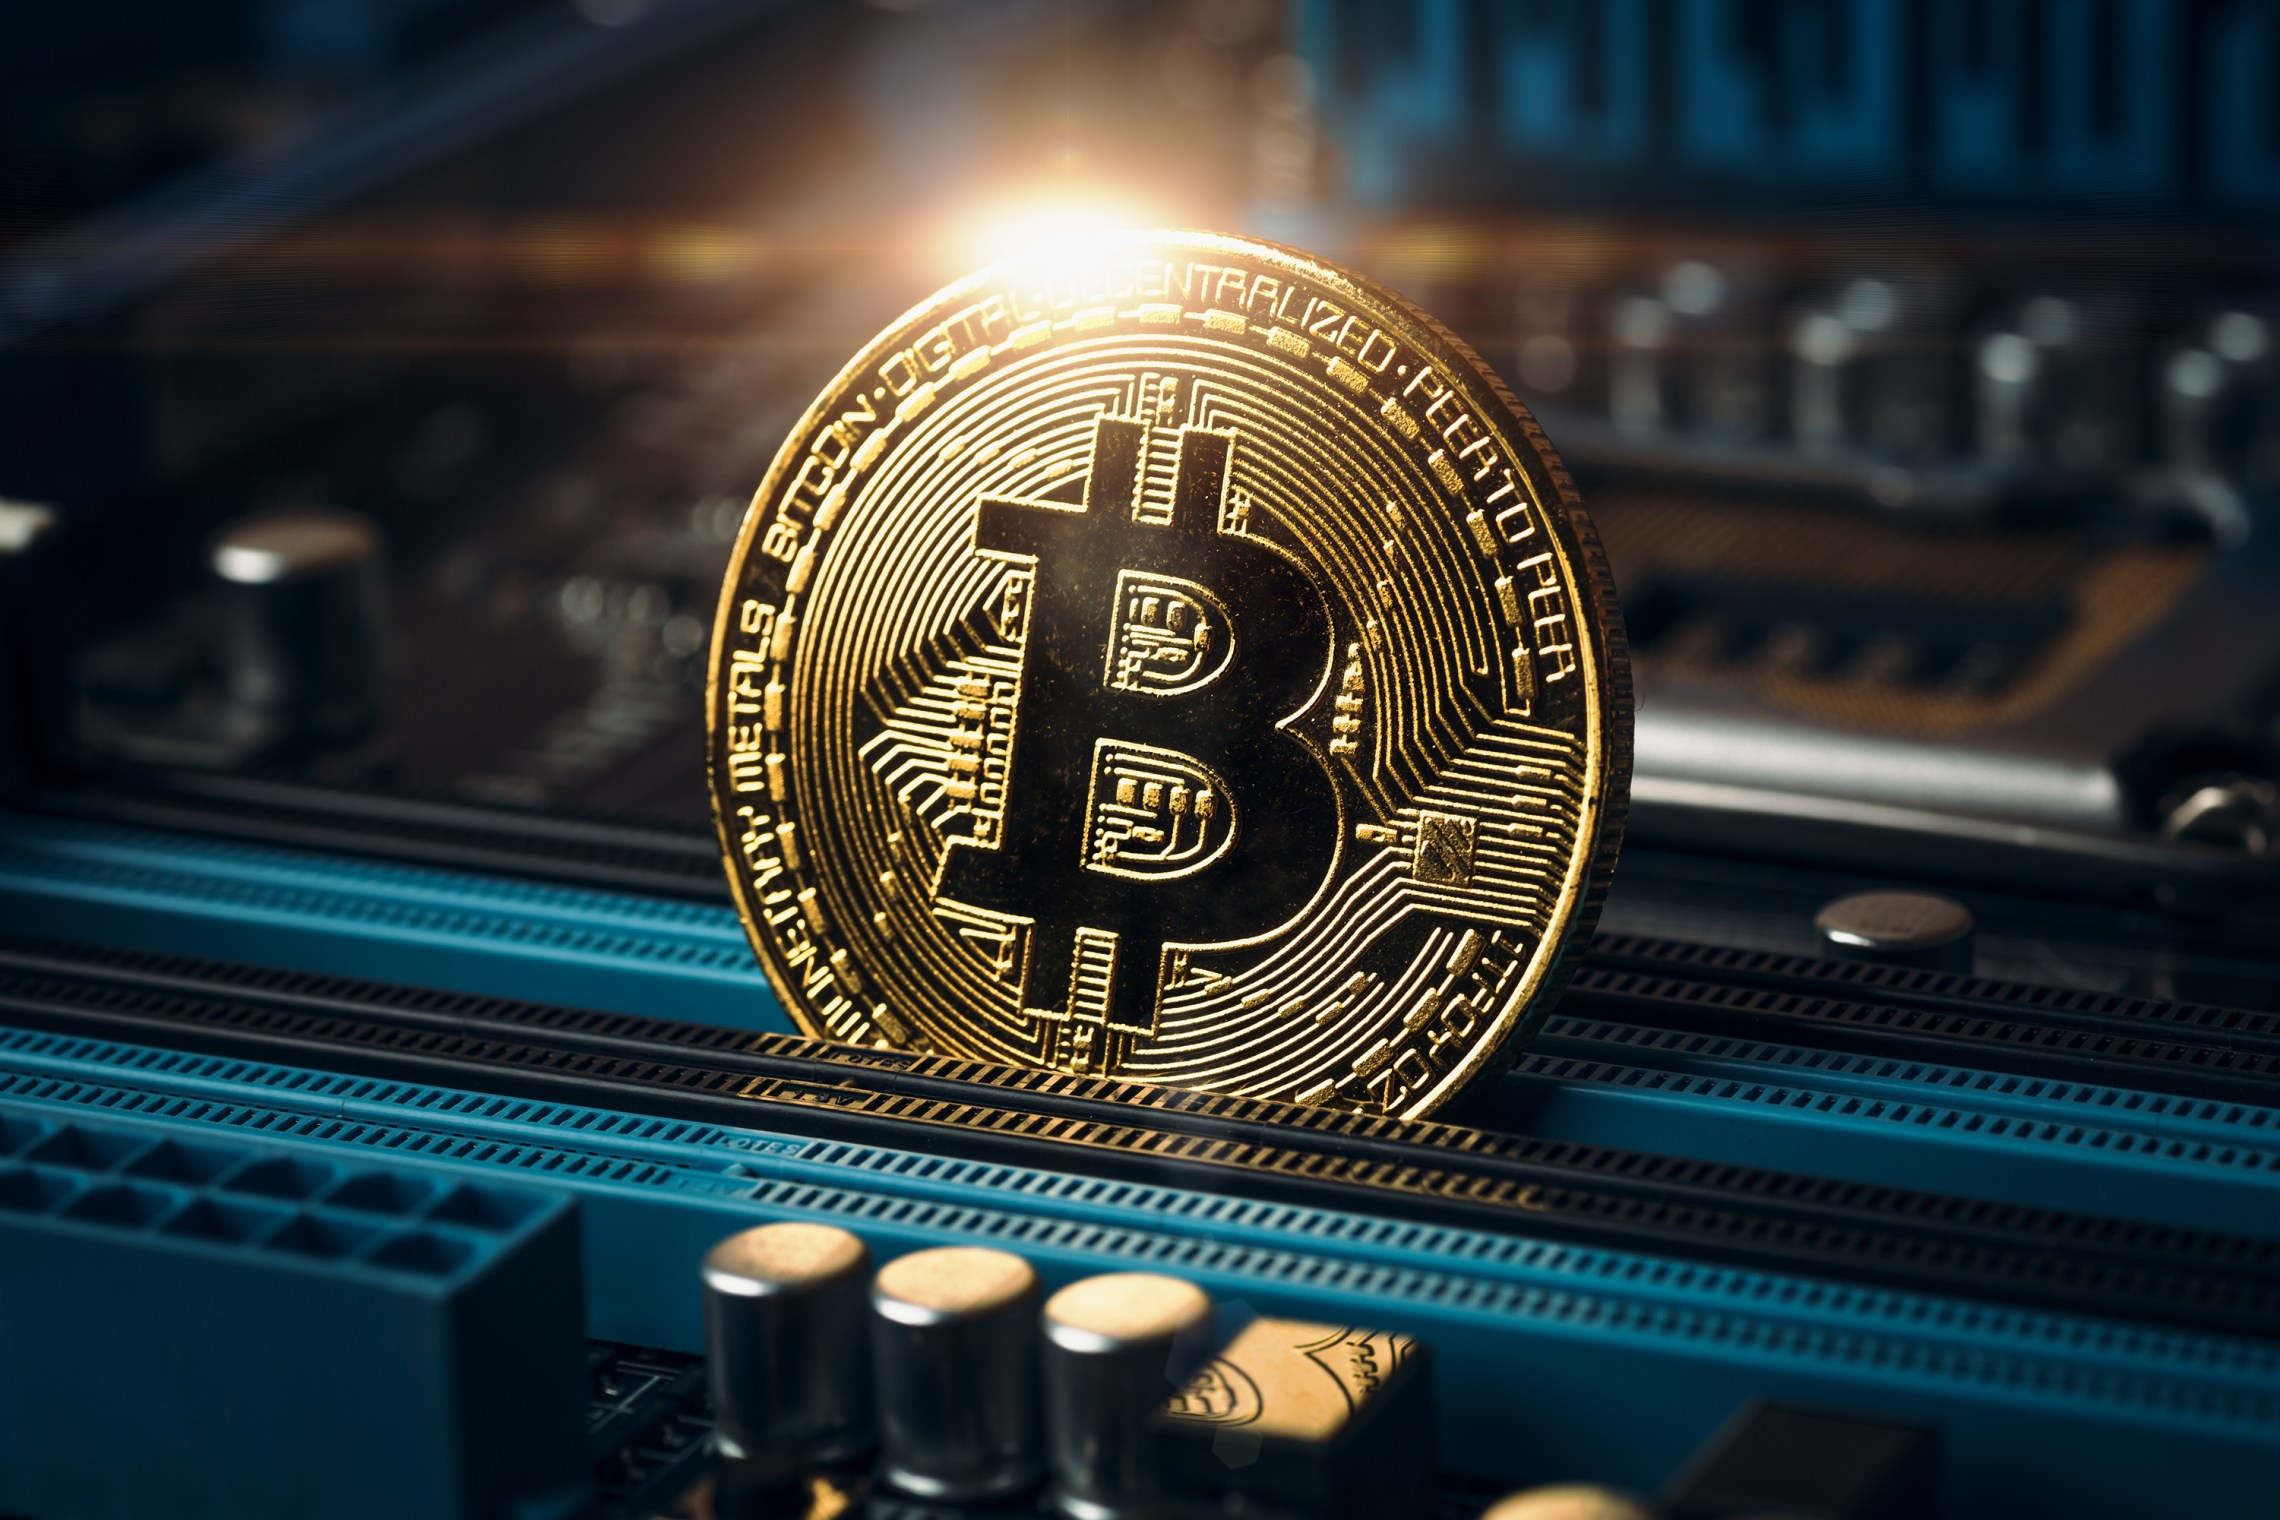

## Dataset

I used yahoo finance to find both bitcoin and ethereum datasets. For the data range, I was only able to get ethereum data starting from 2015-08-07 so I will drop bitcoin's data before that day so that it's easier when we are comparing them. Link below is where I got the data set:

1. https://finance.yahoo.com/quote/BTC-USD/history/
2. https://finance.yahoo.com/quote/ETH-USD/history/

## Imports
Here I import plotly, seaborn, and matplotlib to create interactive plots. I also used sklean model for machine learning. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import plotly.express as px

## Data collection
I downloaded bitcoin and ethereum dataset from yahoo finance so I can easily create dataframes for them. Both datasets come with same catogories: Date, Open price, High price, Low price, Close Price, Adj Close price, and Volume.

In [2]:
btc = pd.read_csv('BTC-USD.csv')
eth = pd.read_csv('ETH-USD.csv')

btc = btc.tail(2319) # make btc same size as eth dataset
btc = btc.reset_index(drop=True) # reset index 
btc # dataset for btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,278.740997,280.391998,276.365997,279.584991,279.584991,4.248480e+07
1,2015-08-08,279.742004,279.928009,260.709991,260.997009,260.997009,5.853300e+07
2,2015-08-09,261.115997,267.002991,260.467987,265.083008,265.083008,2.378960e+07
3,2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,2.097940e+07
4,2015-08-11,264.342010,270.385986,264.093994,270.385986,270.385986,2.543390e+07
...,...,...,...,...,...,...,...
2314,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,3.367681e+10
2315,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,2.847970e+10
2316,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,2.960358e+10
2317,2021-12-10,47642.144531,50015.253906,47023.699219,47243.304688,47243.304688,3.096601e+10


In [3]:
eth # dataset for eth

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
...,...,...,...,...,...,...,...
2314,2021-12-07,4358.586914,4428.589355,4264.323730,4315.061523,4315.061523,2.236621e+10
2315,2021-12-08,4311.674316,4453.112305,4234.537598,4439.357910,4439.357910,1.870432e+10
2316,2021-12-09,4433.024902,4482.313965,4078.844238,4119.815918,4119.815918,2.229613e+10
2317,2021-12-10,4113.588379,4227.111816,3897.767578,3908.496094,3908.496094,2.801460e+10


## Data Cleaning
Here I want to add a few more columns to our datasets, it will make our datasets more informatic and meet my requirements when I'm doing analysis. I added Year and month columns to have more specific date information in the datasets. I also added daily percentage change rate and Volatility per day columns. 

In [4]:
# store year and month seperate from data
btc['Year'] = btc['Date'].astype(str).str[0:4]
btc['Month'] = btc['Date'].astype(str).str[5:7]
eth['Year'] = eth['Date'].astype(str).str[0:4]
eth['Month'] = eth['Date'].astype(str).str[5:7]

# drop adj close column since its not useful here
btc = btc.drop(columns=["Adj Close"])
eth = eth.drop(columns=["Adj Close"])

In [5]:
# Calculate daily % change in btc and eth
btc['daily_change_percentage'] = (btc['Open']-btc['Close'])/btc['Open'] * 100
btc['daily_change_percentage'] = btc['daily_change_percentage'].round(decimals=2)
eth['daily_change_percentage'] = (eth['Open']-eth['Close'])/eth['Open'] * 100
eth['daily_change_percentage'] = eth['daily_change_percentage'].round(decimals=2)

# Include Volatility Column which find the difference between the high and low
btc['Volatility'] = btc['High'] - btc['Low']
eth['Volatility'] = eth['High'] - eth['Low']

## Exploratory Analysis and Data Visualization
Now, I will visualize our data using plots, this can give us a better understanding of how bitcoin and Ethereum have moved in recent years, people can also find when was the high and low easily. I'll first plot the graphs from a large time scale to have an overview. I used Plotly here to make the plots, advantage of using Plotly is that it's very interactive. If I put my mouse on any point of the line, I will get more information about the value and index.

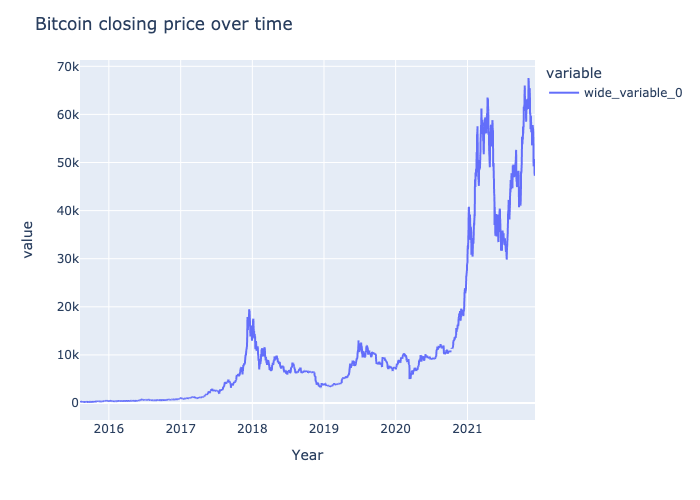

In [6]:
# line chart of btc closing price over years
fig = px.line(x = btc.Date, y=[btc.Close])
fig.update_layout(title = 'Bitcoin closing price over time',
                  xaxis_title = 'Year')
fig.show("png")

From the chart above for bitcoin closing price over time, we can see that there was a sharp rise in 2017 but dropped a lot and consolidated between 2018-2020. And from 2021, it had an exponential growth again and reached almost 70k. The price of bitcoin fluctuates a lot and there seems always to have a significant drop after a sharp rise. 

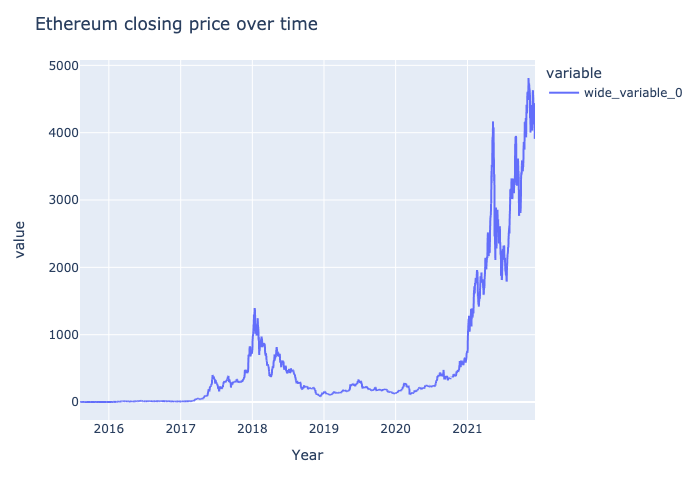

In [7]:
# line chart of eth closing price over years
fig = px.line(x = eth.Date, y=[eth.Close])
fig.update_layout(title = 'Ethereum closing price over time',
                 xaxis_title = 'Year')
fig.show("png")

From the plot above, Ethereum also had a sharp rise in 2017 and consolidated between 2018-2020, then it had exponential growth in 2021. 

Now, we can combine two graphs and see the similarity of them on how prices change over time. Clearly, Bitcoin had larger "waves" compared to ethereum, this is because Bitcoin has more value so it's flucuate range of also larger. But from this plot, seems like there is some correlation between bitcoin and ethereum. We can do more analysis on it later and verify if our observation is true. 

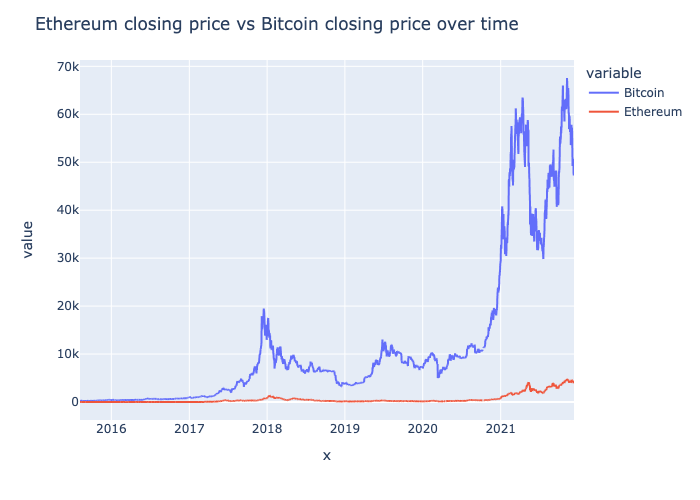

In [8]:
# Visualizing absolute closing prices for eth and btc
x_btc = btc.index
z_btc = btc['Close']
x_eth = eth.index
z_eth = eth['Close']

fig = px.line(x=btc.Date, y=[z_btc, z_eth])
newnames = {'wide_variable_0': 'Bitcoin', 'wide_variable_1': 'Ethereum'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.update_layout(title = 'Ethereum closing price vs Bitcoin closing price over time')
fig.show("png")

Box chart can help us identify the skewness of the data set and give us a good summary. So I made a box chart for Bitcoin and Ethereum. I tested their open price, close price, high price, and low price. From both box charts, I noticed boxes are all really close to the bottom. This means most of the time in the 6 years, Bitcoin and Ethereum stayed at a low price compared with their current price. This also points out that significant growth in 2021 has never happened before. 

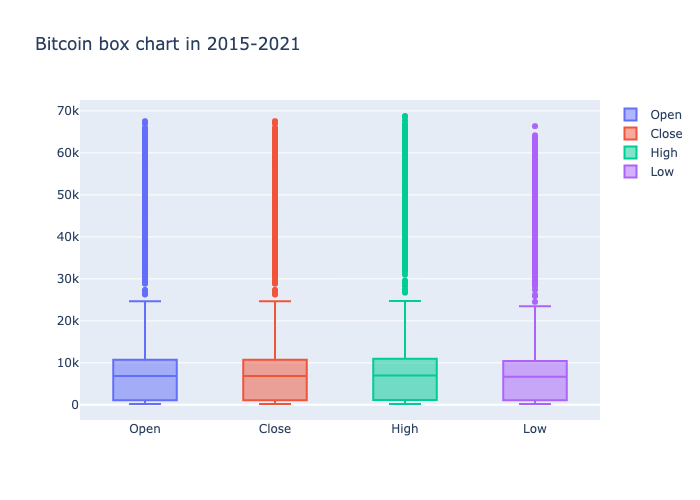

In [9]:
# Box chart for btc
fig = go.Figure()
fig.add_trace(go.Box(y=btc.Open, name='Open'))
fig.add_trace(go.Box(y=btc.Close, name='Close'))
fig.add_trace(go.Box(y=btc.High, name='High'))
fig.add_trace(go.Box(y=btc.Low, name='Low'))
fig.update_layout(title = 'Bitcoin box chart in 2015-2021')
fig.show("png")
 

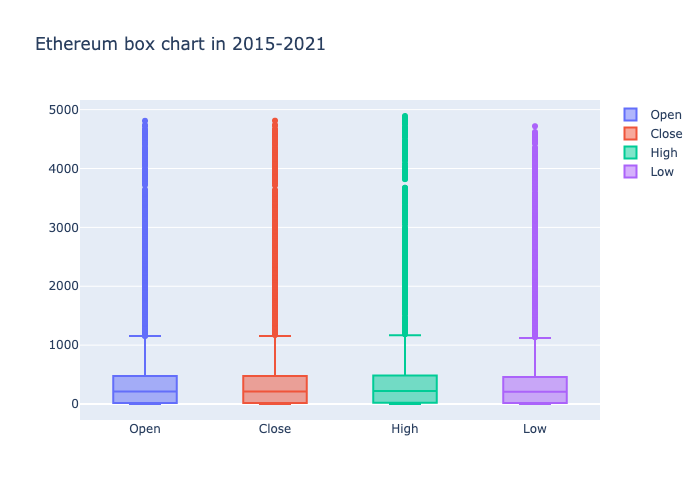

In [10]:
# Box chart for eth
fig = go.Figure()
fig.add_trace(go.Box(y=eth.Open, name='Open'))
fig.add_trace(go.Box(y=eth.Close, name='Close'))
fig.add_trace(go.Box(y=eth.High, name='High'))
fig.add_trace(go.Box(y=eth.Low, name='Low'))
fig.update_layout(title = 'Ethereum box chart in 2015-2021')
fig.show("png")
 

Now, let look at Bitcoin and Ethereum in one year period. let's see how box charts will look different compared with before. From the plots, we can tell boxes are located in the middle instead of the bottom, which means data are better distributed and our median is close to the average. This observation means bitcoin and Ethereum are sitting at a much higher price now compared to a few years ago.

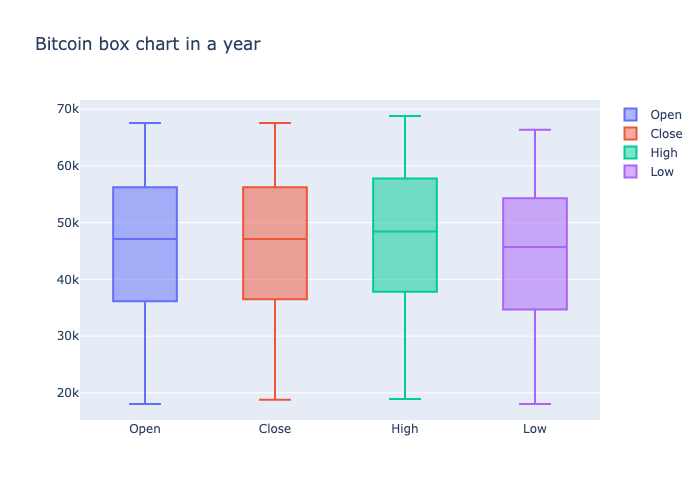

In [11]:
# One year period
# How these graphs different from above?
one_year_btc = btc.tail(365)
one_year_eth = eth.tail(365)
fig = go.Figure()
fig.add_trace(go.Box(y=one_year_btc.Open, name='Open'))
fig.add_trace(go.Box(y=one_year_btc.Close, name='Close'))
fig.add_trace(go.Box(y=one_year_btc.High, name='High'))
fig.add_trace(go.Box(y=one_year_btc.Low, name='Low'))
fig.update_layout(title = 'Bitcoin box chart in a year')
fig.show("png")

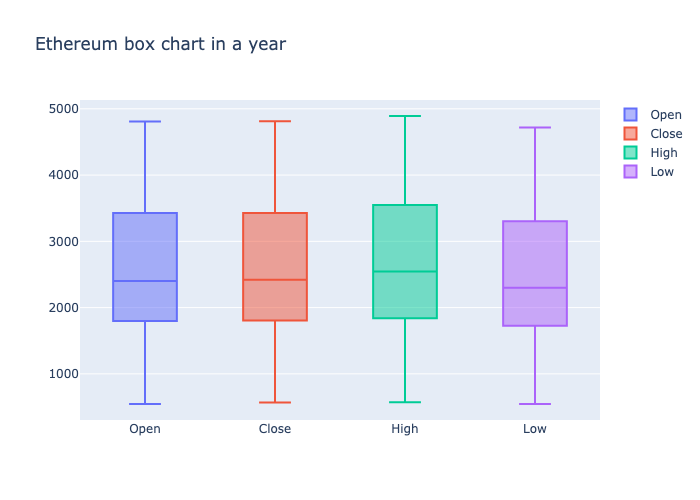

In [12]:
fig = go.Figure()
fig.add_trace(go.Box(y=one_year_eth.Open, name='Open'))
fig.add_trace(go.Box(y=one_year_eth.Close, name='Close'))
fig.add_trace(go.Box(y=one_year_eth.High, name='High'))
fig.add_trace(go.Box(y=one_year_eth.Low, name='Low'))
fig.update_layout(title = 'Ethereum box chart in a year')
fig.show("png")

The bar graphs below indicate the volume of bitcoin and Ethereum from 2015-2021. We can see that volume of Bitcoin increased approximately 100% every year starting from 2017 but slows down in 2021 with approximately 50% growth. Ethereum's growth rate is still 100% every year.

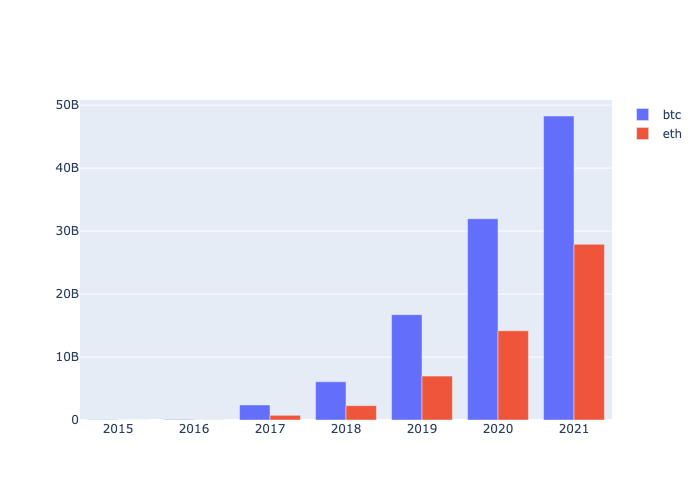

In [13]:
# Volume Graphs Grouped by Year
fig = go.Figure()

btc_annual_avg = btc.groupby(['Year']).mean()
fig.add_trace(go.Bar(x=btc_annual_avg.index, y=btc_annual_avg.Volume, name='btc'))
eth_annual_avg = eth.groupby(['Year']).mean()
fig.add_trace(go.Bar(x=eth_annual_avg.index, y=eth_annual_avg.Volume, name='eth'))
fig.show("png")


Now, we can use a heat map to calculate the correlation between Bitcoin and Ethereum. Heap map correlation range from -1 to 1. Values closer to 0 mean there is no linear relation between two variable, and values closer to 1 mean there is a positive correlation between them, and values closer to -1 means a negative correlation between them. I ended up getting 0.9295 as the correlation value, which means Bitcoin and Ethereum are highly correlated. 

<AxesSubplot:>

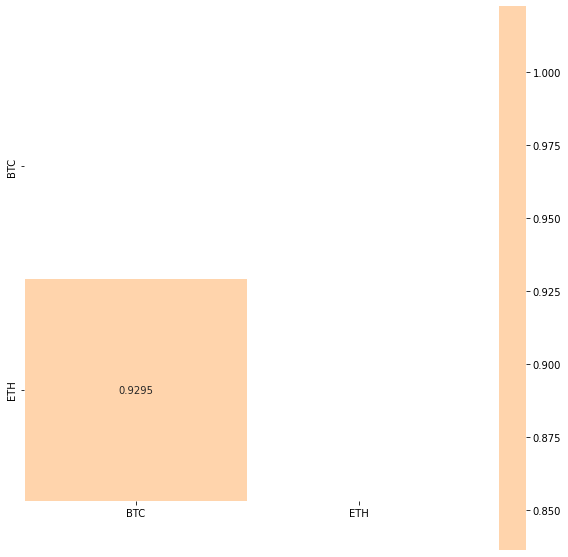

In [14]:
# We are going to use closing prices of btc and eth to analyze the correlation between them, 
corr_data = pd.DataFrame()
corr_data['BTC'] = btc['Close']
corr_data['ETH'] = eth['Close']
corr = corr_data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.4f', mask=mask, center=0, square=True,linewidths=.5)

In [15]:
corr_data # I put btc and eth closing price together so that it was easier when we want to compare them using heatmap

,BTC,ETH
0,279.584991,2.772120
1,260.997009,0.753325
2,265.083008,0.701897
3,264.470001,0.708448
4,270.385986,1.067860
...,...,...
2314,50700.085938,4315.061523
2315,50504.796875,4439.357910
2316,47672.121094,4119.815918
2317,47243.304688,3908.496094


We can use the buy and hold strategy to analyze the return for both eth and btc over years. Buy and hold strategy is a passive investment strategy in which an investor makes a buy and holds them for a long period of time. 
We can calculate the return percentage using formula return_(t,0) = price_t / price_0 where t denotes a certain period and price_0 denotes the initial closing price

In [16]:
# Using buy and hold strategy 
df_return = corr_data.apply(lambda x: x/x[0])
df_return.head()

,BTC,ETH
0,1.000000,1.000000
1,0.933516,0.271751
2,0.948130,0.253199
3,0.945938,0.255562
4,0.967098,0.385214


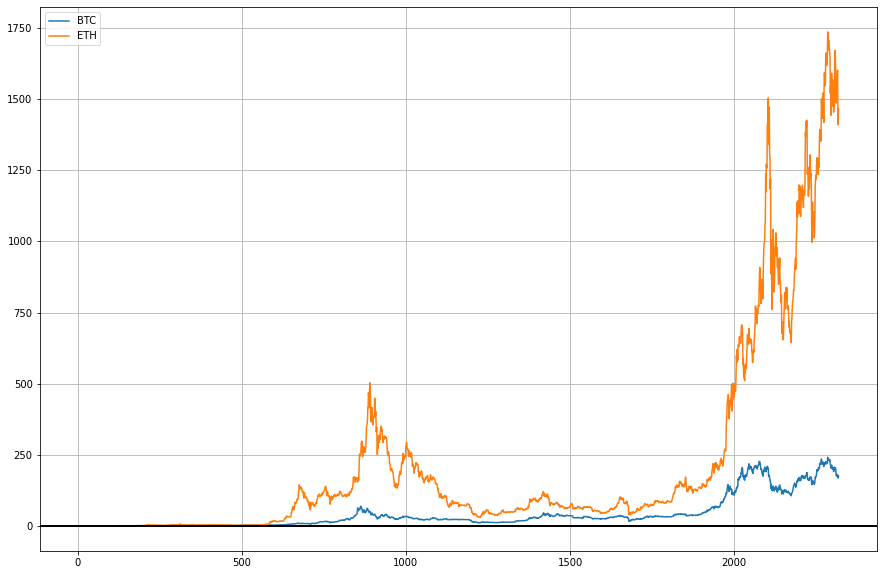

In [17]:
df_return.plot(grid=True, figsize=(15,10)).axhline(y=1, color='black', lw=2)

from the plot we got above, Ethereum seems to have more profits using buy and hold strategy. 

## Puting 100 dollars in 6 years ago, How much is it now?

So let's make an experiment to show how bitcoin and Ethereum would profit us using buy and hold strategy. Let's assume we bought 100 dollars each for bitcoin and Ethereum 6 years ago, how much does it worth today?

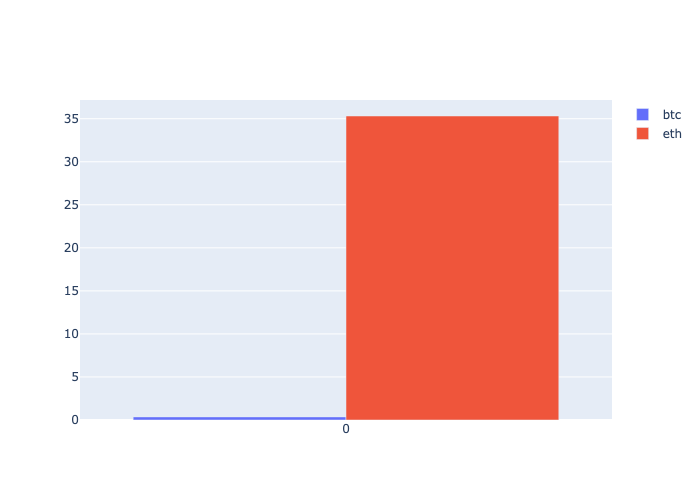

In [18]:
btc_start = btc[btc.Date == '2015-08-07'].Open
eth_start = eth[eth.Date == '2015-08-07'].Open

btc_start = 100 / btc_start
eth_start = 100 / eth_start
fig = go.Figure()

fig.add_trace(go.Bar(y=btc_start, name='btc'))

fig.add_trace(go.Bar(y=eth_start, name='eth'))
fig.show("png")


From the plot above, we were able to get 35.3 Ethereum and 0.36 Bitcoin with 100 dollars 6 years ago. let's see how much do they worth now?

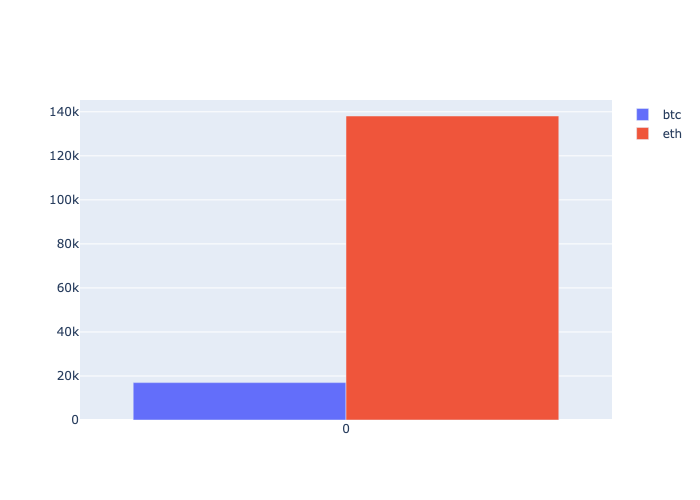

In [19]:
# How much do they worth today?
btc_today = btc_start * 47339.375
eth_today = eth_start * 3910.432861

fig = go.Figure()
fig.add_trace(go.Bar(y=btc_today, name='btc'))
fig.add_trace(go.Bar(y=eth_today, name='eth'))

fig.show("png")

From the plot we got, those Bitcoin would be worth approximately 17,000 dollars, and those Ethereum would be worth approximately 138,000 dollars. Did the result surprise you? By only investing 100 dollars, we can make a profit of over 10000 times profit by Ethereum. Bitcoin also had a good profit over the years but compared with Ethereum, Ethereum had a lot more potentials. 

## Prediction using Support Vector Regression
Now, let's make a prediction program on Bitcoin. I'll be using train_test_split procedure to estimate the performance of the machine learning algorithm and support vector regression to simple class separation. You can read more about SVM [here](https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/). So what I will do is use previous data, and do a prediction on the most recent 100 days of bitcoin. And then I will check my accuracy of prediction. 

I learned from [this](https://randerson112358.medium.com/build-a-bitcoin-price-prediction-program-using-machine-learning-and-python-89f3dc6cb3b1) resource when doing the prediction 


In [20]:
predict_btc = pd.DataFrame()
predict_btc = btc
predict_btc = btc[['Close']]
predict_btc

,Close
0,279.584991
1,260.997009
2,265.083008
3,264.470001
4,270.385986
...,...
2314,50700.085938
2315,50504.796875
2316,47672.121094
2317,47243.304688


In [21]:
predict_days = 100 
predict_btc

# set the prediction dataset up to 100 days before the current day
predict_btc['Prediction'] = predict_btc['Close'].shift(-predict_days)
y = np.array(predict_btc['Prediction'])
y = y[:-predict_days]
x = np.array(predict_btc.drop('Prediction',axis=1))
x = x[:len(predict_btc)-predict_days]

/var/folders/r5/8tghtmg170s8chwx3g50rdrc0000gn/T/ipykernel_26874/2866589570.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
# Use train test split to split the data to 20% and 80% testing data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
arr = np.array(predict_btc.drop('Prediction',axis=1))[-predict_days:]

# This will replace NaN values with 0 and large infinite numbers to infinite 
x_train = np.nan_to_num(x_train)
y_train = np.nan_to_num(y_train)
x_test = np.nan_to_num(x_test)
y_test = np.nan_to_num(y_test)

Now, we will use Support Vector regression model with radial basis function kernal to train the model. A kernal is a function that takes a nono-linear problem and tranforms it into a linear one. Gamma will affect the size of decision region. So when gamma is low, the curve for the decision boundary is also low and thus the decision region will be large. 

In [23]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00000001)
svr_rbf.fit(x_train, y_train) 

SVR(C=1000.0, gamma=1e-08)

Now using score function to give our prediciton a accuracy score, we got 0.8765 which means it's a pretty good prediction.

In [24]:
svr_rbf_accuracy = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_accuracy)

svr_rbf accuracy:  0.8691474418433816


In [25]:
pred = svr_rbf.predict(arr)
print(pred) # print the predicted dataset

[41054.23321918 41128.85206326 39431.23484493 38609.87565102
 43769.92718596 44284.07629566 44074.30323744 45066.8662644
 44869.89244131 44303.40907766 45018.30047854 43558.68055524
 42692.36175911 43015.83002005 43424.36784065 42606.7510924
 43430.01452613 46232.62048218 47464.40384007 45828.47174077
 45060.02396909 46234.84816687 46302.57851327 46031.70921169
 46567.99494447 47256.83908825 46946.33460292 45706.93898081
 42741.9096387  43073.86558636 42672.61085401 41883.40854351
 39656.08346178 36272.06611442 37555.35134094 37414.88377953
 36581.49800447 36740.25538298 34802.04234243 35763.82598586
 34853.3460579  34902.63264851 32890.98154532 33143.28746731
 32904.81825214 32747.43937737 32117.68044668 31720.72324709
 32688.78583675 33219.8972833  32960.48111723 33128.72592576
 32441.08376927 33350.67239064 34231.96990873 33247.29856289
 32683.19237439 32792.11735232 32986.8843994  33101.23404913
 32388.78799411 32460.94345393 32939.94554946 33056.54301639
 32913.82642508 32361.0678

In [26]:
predict_btc.tail(predict_days) # this is the original data for the last 100days

,Close,Prediction
2219,50025.375000,NaN
2220,49944.625000,NaN
2221,51753.410156,NaN
2222,52633.535156,NaN
2223,46811.128906,NaN
...,...,...
2314,50700.085938,NaN
2315,50504.796875,NaN
2316,47672.121094,NaN
2317,47243.304688,NaN


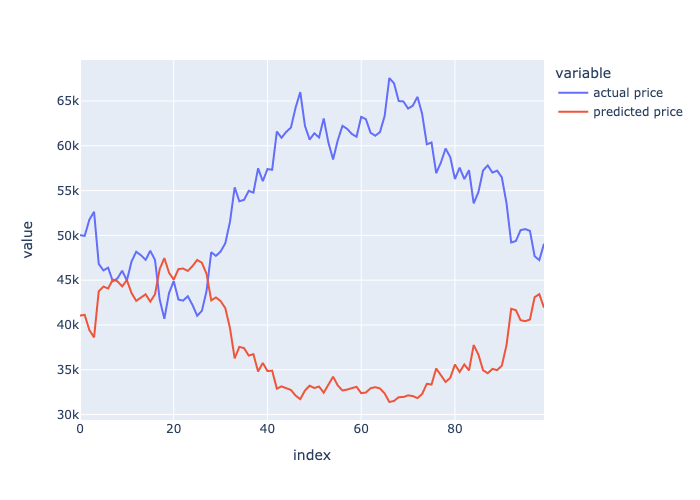

In [27]:
# prediction for 100 days
actual_price = predict_btc.tail(predict_days)
fig = px.line(arr, y=[actual_price.Close, pred])
newnames = {'wide_variable_0': 'actual price', 'wide_variable_1': 'predicted price'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show("png")

We can see that the predicted price we got was like the symmetric version to the actual price at 42,000. This is not ideal but the price different isn't too much. 

## Conclusion
Within this tutorial, I analyze the bitcoin and Ethereum in the last 6 years from their prices, volume, time, and other aspects. After doing the experiments and analyzing through plots, we know that Ethereum has more potential and would be more profitable compared with Bitcoin. Moreover, the skyrocket of the cryptocurrency market in 2021 also affects the overall price data a lot. During the machine learning part, I used the SVR model to predict bitcoin most recent 100 days prices, I was able to get a decent prediction. 




## Want to know more about Bitcoin or Ethereum, read the following resources:

#### How to buy Bitcoin? [Click here](https://www.investopedia.com/articles/investing/082914/basics-buying-and-investing-bitcoin.asp)
#### Is cryptocurrency a good investment? [Click here](https://www.fool.com/investing/stock-market/market-sectors/financials/cryptocurrency-stocks/is-cryptocurrency-good-investment/)
#### Ethereum price prediction [Click here](https://coinpriceforecast.com/ethereum-forecast-2020-2025-2030)